In [4]:
!pip install keras-drop-block
from __future__ import print_function # import for upgrade Library
import keras
import numpy as np
import tensorflow
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPool2D,Activation
from keras import utils as np_utils
import matplotlib.pyplot as plt
%matplotlib inline
import cv2 
from sklearn.model_selection import train_test_split
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle competitions download -c kuzushiji-ml-it-kmitl-2020 --force #Use kaggle api to get data 

 35% 11.0M/31.5M [00:00<00:00, 112MB/s]
100% 31.5M/31.5M [00:00<00:00, 151MB/s]
  0% 0.00/396k [00:00<?, ?B/s]
100% 396k/396k [00:00<00:00, 124MB/s]
 96% 121M/126M [00:01<00:00, 112MB/s] 
100% 126M/126M [00:01<00:00, 98.5MB/s]


In [ ]:
!unzip *.zip && rm *.zip #unzip data

Archive:  test-images.npy.zip
caution: filename not matched:  train-images.npy.zip


In [9]:
x = np.load('/content/drive/MyDrive/train-images.npy')
y = np.load('/content/drive/MyDrive/train-labels.npy')
test = np.load('/content/drive/MyDrive/test-images.npy')

In [73]:
freq, label = np.unique(y, return_counts = True)
#สร้างตัวแปรจากคำสั่งโดยจะมอง ค่าที่เป็น uniqueของ label และความถี่ในแต่ละ label

Text(0, 0.5, 'Frequency of each label')

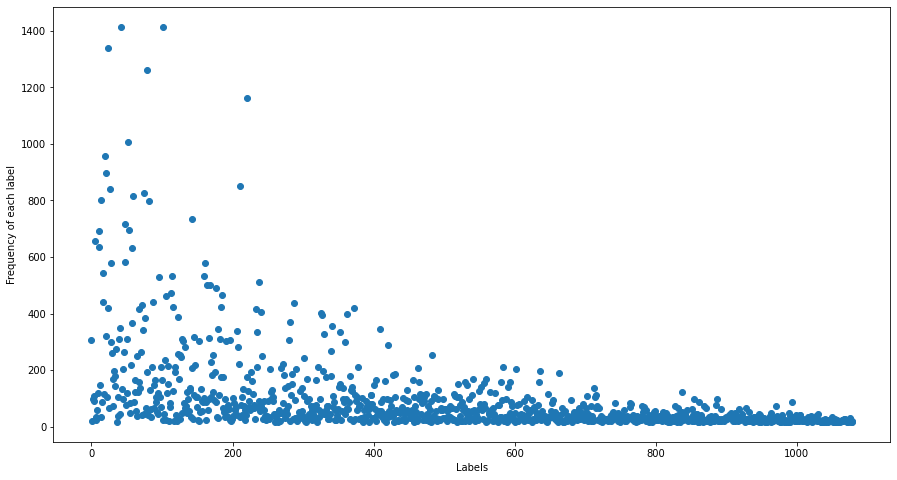

In [72]:

"""plot ดูความถี่ของค่าในแต่ละ label"""
plt.figure(figsize=(15,8))
plt.scatter(freq,label)
plt.xlabel("Labels")
plt.ylabel("Frequency of each label")


In [6]:
width = 80
height = 80
img_stack_sm = np.zeros((len(x), width, height)) #สร้างโครงข้อมูลมาเพื่อใช้เก็บข้อมูล(ช่วยลดระยะเวลา) 

for idx in range(len(x)):
    """Resolution data โดยกำหนดค่าความกว้างและความสูงของข้อมูลและทำการใช้ resize ด้วย
        ไลบรารี ของ python คือ cv2
    """
    img = x[idx, :, :]
    img_sm1 = cv2.resize(img, (width, height), interpolation=cv2.INTER_CUBIC)
    img_stack_sm[idx, :, :] = img_sm1 #นำข้อมูลที่ resize แล้วไปเข้าโครงของข้อมูลที่สร้างไว้

In [7]:
width = 80
height = 80
img_stack_sm_test = np.zeros((len(test), width, height))

for idx in range(len(test)):
    img = test[idx, :, :]
    img_sm = cv2.resize(img, (width, height), interpolation=cv2.INTER_CUBIC)
    img_stack_sm_test[idx, :, :] = img_sm

# Show sample Data


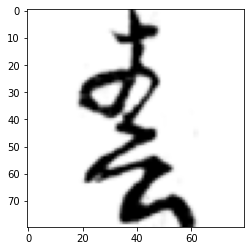

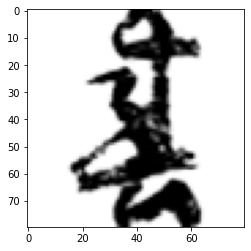

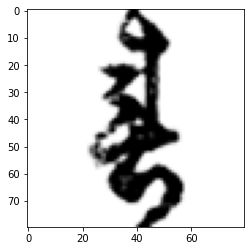

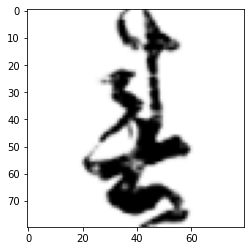

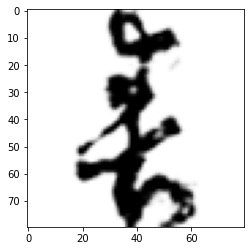

In [79]:
for i in range(5):
    """Resize Picture"""
    img = img_stack_sm[i]
    plt.imshow(img, cmap="Greys")
    plt.show()

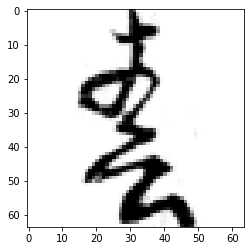

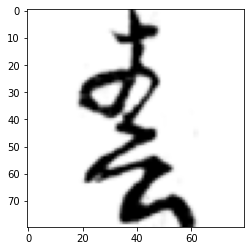

In [81]:
for i in range(1):
    pic = x[i]
    plt.imshow(pic, cmap='Greys')
    plt.show()
    img = img_stack_sm[i]
    plt.imshow(img, cmap="Greys")
    plt.show()

# model train

In [8]:
# Set numeric type to float32 and Normalize value to [0,1] by divided 255(จำนวน pixelภาพ จะมีตั้งแต่ 0-255)
img_stack_sm = np.expand_dims(img_stack_sm.astype(K.floatx()) / 255, axis=-1) #Normalize data

In [9]:
img_stack_sm_test = np.expand_dims(img_stack_sm_test.astype(K.floatx()) / 255, axis=-1)

In [10]:
# Transform lables to one-hot encoding
n_classes = 1080 #Label [0, 1079]
print("Shape before one-hot encoding: ", y.shape)
y = np_utils.to_categorical(y, n_classes)

Shape before one-hot encoding:  (101376,)


In [ ]:
print('X_train shape:', img_stack_sm.shape)
print('X_test shape:', img_stack_sm_test.shape)
print('y_train shape:', y.shape)

X_train shape: (101376, 80, 80, 1)
X_test shape: (25344, 80, 80, 1)
y_train shape: (101376, 1080)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(img_stack_sm, y, test_size=0.25, random_state=0) #split data for test

In [ ]:

model1 = keras.Sequential([
  #  keras.layers.AveragePooling2D(6,3, input_shape=(80,80,1)),
  # First layer we don't need much of filter ในส่วนแรกเราจะไม่ให้มีการกรองอะไรเยอะเผื่อมีข้อมูลลักษณะที่ดีอยู่
   keras.layers.Conv2D(64, 5, activation='relu', padding='same',input_shape=(80,80,1)), #Create First Convolutional layer
   #In First layer of Convolutional use 64 filter with 5,5 Kernelsize by relu Algorithms with no padding
   keras.layers.MaxPool2D(2,2), #สร้าง pool มาเพื่อย่อภาพ
   keras.layers.Dropout(0.35), #Create Dropout for reduce overfit
   keras.layers.Conv2D(64,5, activation='relu', padding='same'), #use relu because it make model train faster
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.35),
   keras.layers.Conv2D(128, 5, activation='relu', padding='same'),# Add more filter 
   keras.layers.MaxPool2D(2,2), 
   keras.layers.Dropout(0.35),
   keras.layers.Conv2D(128, 5, activation='relu', padding='same'), 
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.35),
   keras.layers.Flatten(),
   keras.layers.Dense(1024, activation='relu'), #Create Hidden layer
   keras.layers.Dropout(0.5), # Increase Drop out to reduce overfit and Imbalance data
   keras.layers.Dense(1080, activation='softmax') #Output layer Choosing softmax instead of sigmoid because it's not binary classifies
])

model1.compile(optimizer=keras.optimizers.Adam(lr=0.001), #Adam optimizer for Large Data with Regularization
              loss=keras.losses.CategoricalCrossentropy(), # Categorical for one hot label(single lable)
              #หากเป็น Sprase จะเป็น predict group of label(หลายตัว)
              metrics=['accuracy'])
model1.summary()
model1.fit(X_train, y_train, epochs=30, batch_size=256,validation_data=(X_test, y_test)) #Create Validation of data by X_test and y_test
# batchsize ที่เลือก 256 เพราะอยากให้มีการจำลอง weight และปรับให้ดีขึ้นจากทุกๆครั้งที่ input เข้าไปโดย 256 คือจำนวน input ที่เข้าไปโมเดลจะได้เห็นถึงการเข้าถึงโมเดลด้วยข้อมูลหลายตัวทำให้ weight มีน้ำหนักที่ดีขึ้น
# อีกหนึ่งสาเหตุที่ใช้batchsize เยอะเพราะข้อมูลมีจำนวนมากทำให้แม้ batchsize เยอะโมเดลยังสามารถเรียนรู้ข้อมูลได้

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 80, 80, 64)        1664      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 40, 40, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 40, 40, 64)        102464    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 128)      

KeyboardInterrupt: ignored

In [ ]:
model1 = keras.Sequential([
  #  keras.layers.AveragePooling2D(6,3, input_shape=(80,80,1)),

   keras.layers.Conv2D(64, 5, activation='relu', padding='same',input_shape=(80,80,1)),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.35),
   keras.layers.Conv2D(64,5, activation='relu', padding='same'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.35),
   keras.layers.Conv2D(128, 5, activation='relu', padding='same'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.35),
   keras.layers.Conv2D(128, 5, activation='relu', padding='same'),
   keras.layers.MaxPool2D(2,2),
   keras.layers.Dropout(0.35),
   keras.layers.Flatten(),
   keras.layers.Dense(1024, activation='relu'),
   keras.layers.Dropout(0.5),
   keras.layers.Dense(1080, activation='softmax')
])

model1.compile(optimizer=keras.optimizers.Adam(lr=0.001),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])
model1.summary()
model1.fit(img_stack_sm, y, epochs=100, batch_size=256)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 80, 80, 64)        1664      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 40, 40, 64)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 40, 40, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 40, 40, 64)        102464    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 20, 20, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 20, 20, 128)      

In [ ]:
y_pred = model1.predict_classes(img_stack_sm_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_pred

array([412,  20, 241, ..., 367, 102, 372])

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/test.csv') #read csv file from google drive

In [ ]:
df['ClassId'] = y_pred
df

,ImageId,ClassId
0,1,412
1,2,20
2,3,241
3,4,790
4,5,557
...,...,...
25339,25340,16
25340,25341,854
25341,25342,367
25342,25343,102


In [ ]:
df.to_csv('fInAl.csv',index=False) #export df to csv 